## Final Project Submission

Please fill out:
* Student name: Floyed Muchiri
* Student pace: full time - remote
* Scheduled project review date/time: 9th JUNE 2024
* Instructor name: Faith Rotich
* Blog post URL:
* Tableau public url: https://public.tableau.com/views/Aviation_data_17178266797050/Dashboard2
* [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses)


# Project overview

### Business problem:
> ### Expanding into the aviation industry

## Objective

> ### Determine the safest aircraft models for commercial and private use

### A company is expanding into aviation industry to diversify its portfolio. 

> * #### Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. 

> * #### As a data analyst, I am charged with determining which aircrafts are the lowest risk for the company to start the new business endeavor.

> * #### The findings will then help the company make decision on which aircraft to start with.

## We are provided with Aviation dataset from NTSA for the research.

#### In the data folder is a copy of Aviation_data.csv, [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

# Data Analysis

### importing the required libraries

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

#### loading the dataset

In [2]:
file_path = 'data/Aviation_Data.csv'

data = pd.read_csv(file_path)


C:\Users\Floyed\AppData\Local\Temp\ipykernel_3796\562718360.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


## Step 1: Data Exploration and Understanding

In [3]:
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


##### In this cell, we invetsgate the data under column investgation type to identify any other investgation to help us filter any irrelevant data

In [6]:
data['Investigation.Type'].value_counts()

Investigation.Type
Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
              ...  
13-09-2021        1
04-08-2021        1
05-08-2022        1
03-11-2020        1
06-01-2021        1
Name: count, Length: 71, dtype: int64

In [7]:
# investgating the incidents

pd.set_option('display.max_columns', None) #to display all columns


incidents = data[data['Investigation.Type']== 'Incident']
incidents.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
23,20020917X02333,Incident,LAX82IA034,1982-01-03,"VAN NUYS, CA",United States,NaN,NaN,VNY,VAN NUYS,Incident,Minor,Airplane,N5018P,Piper,PA-24-180,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,03-01-1983
40,20020917X01764,Incident,ATL82IA029,1982-01-05,"PENSACOLA, FL",United States,NaN,NaN,NaN,NaN,Incident,Minor,Airplane,N5782N,Rockwell,114,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Business,NaN,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause,05-01-1983
79,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,NaN,NaN,ORD,CHICAGO O'HARE INTER'L,Incident,NaN,Airplane,N31031,Lockheed,L-1011,No,3.0,Turbo Fan,Part 121: Air Carrier,SCHD,Unknown,Trans World Airlines,0.0,0.0,0.0,149.0,UNK,Cruise,Probable Cause,12-01-1983
80,20020917X01765,Incident,ATL82IA034,1982-01-12,"CLARKSBURG, WV",United States,NaN,NaN,CKB,BENEDUM,Incident,Minor,Airplane,N615KC,Embraer,EMB-110P1,No,2.0,Turbo Prop,Part 135: Air Taxi & Commuter,SCHD,Unknown,Aeromech Incorporated,0.0,0.0,0.0,2.0,VMC,Taxi,Probable Cause,12-01-1983
119,20020917X01766,Incident,ATL82IA038,1982-01-19,"WASHINGTON, DC",United States,NaN,NaN,IAD,NaN,Incident,Minor,Airplane,N9240N,De Havilland,DHC-6-300,No,2.0,Turbo Prop,Part 91: General Aviation,NaN,Ferry,NaN,0.0,0.0,0.0,1.0,IMC,Descent,Probable Cause,19-01-1983
131,20020917X02334,Incident,LAX82IA044,1982-01-20,"SAN JOSE, CA",United States,NaN,NaN,SJC,SAN JOSE MUNICIPAL,Incident,Minor,Airplane,N74HP,Piper,PA-31-350,No,2.0,Reciprocating,Part 91: General Aviation,NaN,Executive/corporate,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,20-01-1983
149,20020917X01767,Incident,ATL82IA041,1982-01-22,"LOUISVILLE, KY",United States,NaN,NaN,SDF,STANDIFORD FIELD,Incident,NaN,Airplane,N18FE,Dassault/sud,FALCON 20,No,2.0,Turbo Fan,Part 121: Air Carrier,SCHD,Unknown,Federal Express Corporation,0.0,0.0,0.0,2.0,VMC,Descent,Probable Cause,22-01-1983
191,20020917X01768,Incident,ATL82IA042,1982-01-29,"ATLANTA, GA",United States,NaN,NaN,NaN,NaN,Incident,NaN,Airplane,N1851S,Beech,B200,No,2.0,Turbo Prop,Part 91: General Aviation,NaN,Executive/corporate,NaN,0.0,0.0,0.0,2.0,VMC,Cruise,Probable Cause,29-01-1983
194,20020917X02335,Incident,LAX82IA062,1982-01-30,"TRUCKEE, CA",United States,NaN,NaN,TRK,TRUCKEE TAHOE,Incident,Minor,Airplane,N9674C,Piper,PA-28R-201T,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,30-01-1983
279,20020917X01769,Incident,ATL82IA051,1982-02-09,"BIRMINGHAM, AL",United States,NaN,NaN,NaN,BIRMINGHAM MUNI,Incident,NaN,Airplane,N205SG,Beech,200,No,2.0,Turbo Prop,Part 91: General Aviation,NaN,Executive/corporate,NaN,0.0,0.0,0.0,10.0,IMC,Takeoff,Probable Cause,09-02-1983


#### we observe that the incidents investgation type does does not contain data neccessary for our safety investgation, so we need to drop them

##### since we are only interested with accidents, we will have to drop or filter the rows with other details other than accidents

In [8]:
# filtering the relevant rows

data = data[data['Investigation.Type']== 'Accident']

data.shape[0]

85015

#### Great, we dropped a few rows

### Also, from the preliminary investgation we observe that the dataset has many missing values and columns that are less important to our investgation. 

# Data Cleaning

### Drop less relevant columns

In [9]:
# columns that do not have relevance to our question can be dropped
columns_to_drop = ['Accident.Number', 'Registration.Number', 'Latitude', 'Longitude', 'Publication.Date', 'Airport.Code', 'Airport.Name']

data = data.drop(columns=columns_to_drop)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85015 entries, 0 to 90347
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                85015 non-null  object 
 1   Investigation.Type      85015 non-null  object 
 2   Event.Date              85015 non-null  object 
 3   Location                84975 non-null  object 
 4   Country                 84809 non-null  object 
 5   Injury.Severity         84688 non-null  object 
 6   Aircraft.damage         83555 non-null  object 
 7   Aircraft.Category       30535 non-null  object 
 8   Make                    84979 non-null  object 
 9   Model                   84955 non-null  object 
 10  Amateur.Built           84957 non-null  object 
 11  Number.of.Engines       80115 non-null  float64
 12  Engine.Type             79155 non-null  object 
 13  FAR.Description         30368 non-null  object 
 14  Schedule                10104 non-null  obj

### change event date to date type

In [10]:
data['Event.Date'] = pd.to_datetime(data['Event.Date'], errors='coerce')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85015 entries, 0 to 90347
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                85015 non-null  object        
 1   Investigation.Type      85015 non-null  object        
 2   Event.Date              85015 non-null  datetime64[ns]
 3   Location                84975 non-null  object        
 4   Country                 84809 non-null  object        
 5   Injury.Severity         84688 non-null  object        
 6   Aircraft.damage         83555 non-null  object        
 7   Aircraft.Category       30535 non-null  object        
 8   Make                    84979 non-null  object        
 9   Model                   84955 non-null  object        
 10  Amateur.Built           84957 non-null  object        
 11  Number.of.Engines       80115 non-null  float64       
 12  Engine.Type             79155 non-null  object     

### Dealing with null values

### for key data which is not continuous such as model, make, we should drop all rows with null values

1.  we should first drop rows that had investagtion that was not accidental, because we are interested in accidents.

2. Critical columns for this analysis can include Make, Model, Injury.Severity, Aircraft.damage, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured., rows with Null values in these columns should be dropped.

In [12]:
# Drop rows where Investigation.Type is not relevant (I.e., keep only 'Accident')
data_cleaned = data[data['Investigation.Type'] == 'Accident']

# Verify the number of rows remaining
print(f"Number of rows after dropping irrelevant rows: {data_cleaned.shape[0]}")

Number of rows after dropping irrelevant rows: 85015


In [13]:
# Drop Rows with Missing Values in Critical Columns

critical_columns = ['Make', 'Model', 'Injury.Severity', 'Aircraft.damage', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 
                    'Total.Minor.Injuries', 'Total.Uninjured']

# Drop rows with missing values in any of the critical columns
data_cleaned = data_cleaned.dropna(subset=critical_columns)

# number of rows remaining
print(f"Number of rows after dropping rows with missing values in critical columns: {data_cleaned.shape[0]}")

Number of rows after dropping rows with missing values in critical columns: 69598


### great, now we have all relevant data accurate

In [14]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69598 entries, 0 to 90345
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                69598 non-null  object        
 1   Investigation.Type      69598 non-null  object        
 2   Event.Date              69598 non-null  datetime64[ns]
 3   Location                69570 non-null  object        
 4   Country                 69408 non-null  object        
 5   Injury.Severity         69598 non-null  object        
 6   Aircraft.damage         69598 non-null  object        
 7   Aircraft.Category       25780 non-null  object        
 8   Make                    69598 non-null  object        
 9   Model                   69598 non-null  object        
 10  Amateur.Built           69597 non-null  object        
 11  Number.of.Engines       66432 non-null  float64       
 12  Engine.Type             65621 non-null  object     

### Standardize data in the 'Make' and 'Model' columns to be stringsV and in the right format

In [15]:
# Standardize Text
data_cleaned['Make'] = data_cleaned['Make'].str.strip().str.upper()
data_cleaned['Model'] = data_cleaned['Model'].str.strip().str.upper()

# ANALYSIS

#### This is the section where we start analysing data to answer the required question 

In [16]:
# lets check what is aircraft category

# Get the frequency of each item in aircraft category
aircraft_category = data_cleaned['Aircraft.Category'].value_counts()

# Print the frequencies
print(f"Airplane category frequencies:")
print(aircraft_category)


Airplane category frequencies:
Aircraft.Category
Airplane             21977
Helicopter            2826
Glider                 417
Weight-Shift           160
Gyrocraft              153
Balloon                113
Powered Parachute       88
Ultralight              23
Unknown                 10
WSFT                     9
Rocket                   1
Powered-Lift             1
Blimp                    1
ULTR                     1
Name: count, dtype: int64


### here we have interesting data:

-- whats in our dataset and whats of importance to the business:

Given the company's goal of entering the aviation industry by purchasing and operating airplanes for commercial and private enterprises, the main concern should focus on categories that are most relevant to these activities. 
Specifically, we should focus on the "Airplane", "Helicopter" categories because it is the most common and widely used for both commercial and private aviation purposes.

#### Filter data for Airplanes and Helicopter categories

In [17]:
# Filter the cleaned dataset for relevant categories (Airplane and Helicopter)
relevant_categories = ['Airplane', 'Helicopter']
data_filtered = data_cleaned[data_cleaned['Aircraft.Category'].isin(relevant_categories)]

data_filtered.shape[0]

24803

## A graph of number of accidents per year

* we first extract year from the dates
* counts accidentsm per year for the graph

In [22]:
#  Extract the year from the 'Event.Date' column

data_filtered['Event.Year'] = data_filtered['Event.Date'].dt.year

C:\Users\Floyed\AppData\Local\Temp\ipykernel_3796\2780474457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Event.Year'] = data_filtered['Event.Date'].dt.year


In [23]:
# Count the number of accidents per year
accidents_per_year = data_filtered['Event.Year'].value_counts().sort_index()
accidents_per_year

Event.Year
1982.0    3285
1990.0       1
1991.0       2
1992.0       1
1993.0       1
1994.0       3
1995.0       3
1996.0       2
1997.0       2
1998.0       3
1999.0       6
2000.0       8
2001.0       2
2003.0       1
2005.0       3
2006.0       3
2007.0      86
2008.0    1676
2009.0    1547
2010.0    1522
2011.0    1594
2012.0    1554
2013.0    1348
2014.0    1351
2015.0    1376
2016.0    1427
2017.0    1405
2018.0    1433
2019.0    1383
2020.0    1207
2021.0    1269
2022.0    1299
Name: count, dtype: int64

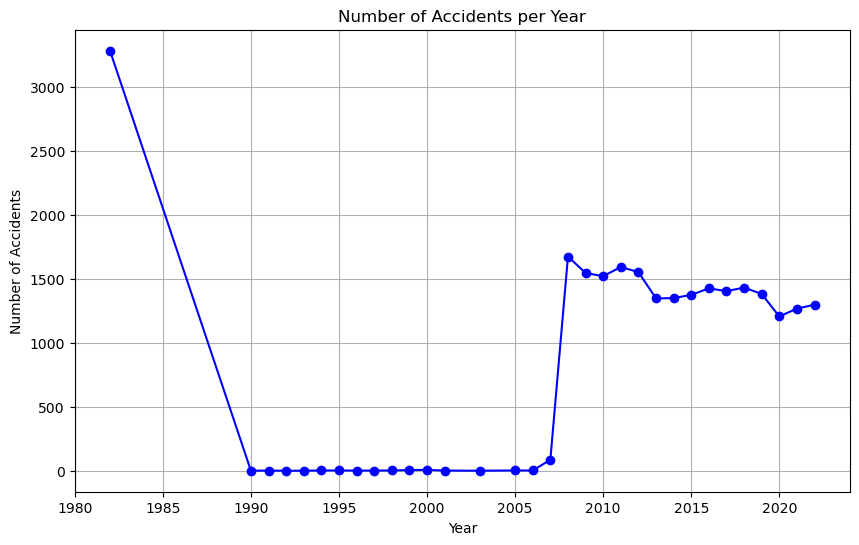

In [24]:
#  Plotting the data as a line graph

plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.grid(True)
plt.show()

* From the graph, we have a sharp decline from 1982 - 1990 - this could be a cumulative sum for all accidents before, secondly, companies from these times could have undergone significant changes to help determine the risk of aircraft
* > < 100 accidents from 1990, to 2006 -  this could be due to underrecording of accidents and may not give accurate or sufficient summarry
* 86 accident in 2007
* A sharp increase to above 1500 in 2008 > this could be the period NTSA started recording all aviation data
* a consistent graph from 2008 -- the accurate data to give us consistent results

#### we have to work with consistent data, a more recent data that reflects the technological changes in companies. 

* > so we will filter to have a consistent data from 2008 to work with and perform our analysis.

In [25]:
working_data = data_filtered[data_filtered['Event.Year'] > 2007]
working_data.shape[0]

21391

#### we plot the curve again

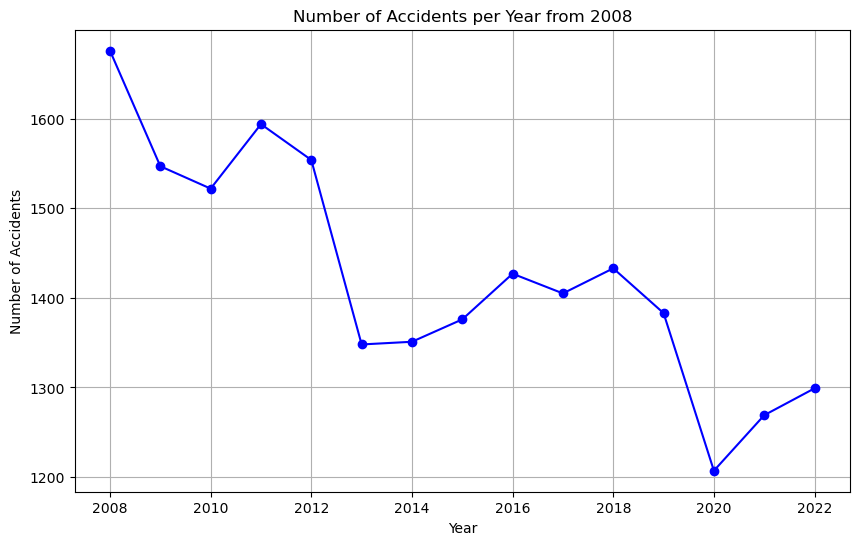

In [26]:
accidents_per_year = working_data['Event.Year'].value_counts().sort_index()

#  Plotting the line graph

plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year from 2008')
plt.grid(True)
plt.show()

1. we can determine the models and number of accidents per model in our working data

In [27]:
# Get the frequency of each model
model_counts = working_data['Model'].value_counts()

# Print the model frequencies
print(f"Airplane model frequencies:")
print(model_counts)

Airplane model frequencies:
Model
172                     694
R44                     271
182                     266
PA28                    261
SR22                    233
                       ... 
DC9                       1
BEAVER U-6                1
U206D                     1
FOKKER DR-1 TRIPLANE      1
PA-44                     1
Name: count, Length: 4302, dtype: int64


#### lets separate the two categories
##### 1. Airplane
##### 2. Helicopter

In [28]:
# Airplane category

Airplane_data = working_data[working_data['Aircraft.Category'] == 'Airplane']

# Helicopter category

Helicopter_data = working_data[working_data['Aircraft.Category'] == 'Helicopter']

### A graph for number of accidents for each category from 2008

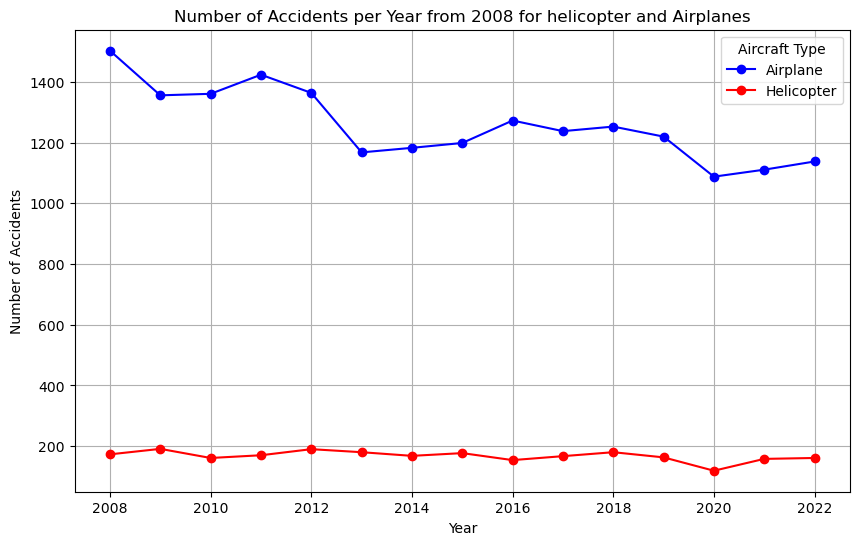

In [29]:
Airplane_accidents_per_year = Airplane_data['Event.Year'].value_counts().sort_index()

Helicopter_accidents_per_year = Helicopter_data['Event.Year'].value_counts().sort_index()


#  Plotting the line graph

plt.figure(figsize=(10, 6))
plt.plot(Airplane_accidents_per_year.index, Airplane_accidents_per_year.values, marker='o', linestyle='-', color='b', label='Airplane')
plt.plot(Helicopter_accidents_per_year.index, Helicopter_accidents_per_year.values, marker='o', linestyle='-', color='r', label='Helicopter')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year from 2008 for helicopter and Airplanes')
plt.grid(True)
plt.legend(title='Aircraft Type')
plt.show()

### Export the two data sets for further investgation using other tools

In [51]:
# Export the datasets to CSV files
Helicopter_accidents_per_year.to_csv('data/Helicopter_accidents.csv', index=False)
Airplane_accidents_per_year.to_csv('data/Airplane_accidents.csv', index=False)

print("Datasets have been successfully exported to 'Helicopter_accidents.csv' and 'Airplane_accidents.csv'")

Datasets have been successfully exported to 'Helicopter_accidents.csv' and 'Airplane_accidents.csv'


In [55]:
# Export the datasets to CSV files
Helicopter_data.to_csv('data/Helicopter_data.csv', index=False)
Airplane_data.to_csv('data/Airplane_data.csv', index=False)

print("Datasets have been successfully exported to 'Helicopter_data.csv' and 'Airplane_data.csv'")

Datasets have been successfully exported to 'Helicopter_data.csv' and 'Airplane_data.csv'


In [30]:
# Get the frequency of each helicopter make
Helicopter_make_counts = Helicopter_data['Make'].value_counts()

# Print the make frequencies
print(f"Helicopter model frequencies:")
print(Helicopter_make_counts)


Helicopter model frequencies:
Make
BELL                           620
ROBINSON                       363
ROBINSON HELICOPTER            221
ROBINSON HELICOPTER COMPANY    181
HUGHES                         152
                              ... 
BERTRAM WILLIAM J                1
SCOTTS-BELL 47 INC               1
JOHNSTON DOUGLAS S               1
CROMAN CORPORATION               1
CHILDS MICHAEL  A                1
Name: count, Length: 217, dtype: int64


In [31]:
# Get the frequency of each Airplane make make
Airplane_make_counts = Airplane_data['Make'].value_counts()

# Print the make frequencies
print(f"Airplane model frequencies:")
print(Airplane_make_counts)

Airplane model frequencies:
Make
CESSNA                5657
PIPER                 3321
BEECH                 1193
MOONEY                 290
BOEING                 259
                      ... 
SHOOK                    1
CROSLEY                  1
SHAW DOUGLAS WAYNE       1
KOTH LARRY               1
ORLICAN S R O            1
Name: count, Length: 2995, dtype: int64


In [32]:
Helicopter_data.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Event.Year
63929,20080122X00087,Accident,2008-01-07,"DeLand, FL",United States,Non-Fatal,Substantial,Helicopter,BELL,407,No,1.0,Turbo Shaft,091,NaN,Positioning,Volusia County Sheriff's Department,0.0,0.0,0.0,2.0,VMC,NaN,A total loss of engine power due to the fatigu...,2008.0
63931,20080220X00219,Accident,2008-01-07,"Zuzenhausen, Germany",Germany,Fatal,Destroyed,Helicopter,BELL,206B,No,NaN,NaN,NUSN,NaN,Aerial Observation,LGM Luftfahrtgesellschaft mbH,1.0,1.0,0.0,0.0,IMC,NaN,NaN,2008.0
63933,20080204X00131,Accident,2008-01-08,"Riverside, CA",United States,Non-Fatal,Substantial,Helicopter,ROBINSON,R-22,No,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,The pilot's misjudged landing flare and improp...,2008.0
63934,20080210X00162,Accident,2008-01-08,"North Palm Bch, FL",United States,Non-Fatal,Substantial,Helicopter,ROBINSON,R22 BETA,No,1.0,Reciprocating,091,NaN,Instructional,Silver State Helicopters LLC,0.0,0.0,1.0,0.0,VMC,NaN,A loss of engine power due to carburetor icing...,2008.0
63939,20080211X00175,Accident,2008-01-10,"Pitt Meadow, BC, Canada",Canada,Non-Fatal,Substantial,Helicopter,EUROCOPTER FRANCE,AS350B3,No,NaN,NaN,NUSN,NaN,External Load,Prism Helicopters,0.0,0.0,0.0,2.0,NaN,NaN,NaN,2008.0


In [33]:
Airplane_data.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Event.Year
63913,20080107X00026,Accident,2008-01-01,"Sonoma, CA",United States,Non-Fatal,Substantial,Airplane,BARNARD/STANCIL,GLASTAR,Yes,1.0,Reciprocating,091,NaN,Personal,Kenneth Couey,0.0,0.0,0.0,3.0,VMC,NaN,The departing pilot's inadequate visual lookout.,2008.0
63914,20080109X00036,Accident,2008-01-01,"Arcola, TX",United States,Non-Fatal,Substantial,Airplane,MICCO AIRCRAFT COMPANY,MAC-145B,No,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to maintain directional co...,2008.0
63915,20080115X00051,Accident,2008-01-02,"Loveland, CO",United States,Non-Fatal,Substantial,Airplane,CESSNA,152,No,1.0,Reciprocating,091,NaN,Instructional,Colorado Contrails,0.0,0.0,0.0,1.0,VMC,NaN,the student pilot's premature flare resulting ...,2008.0
63916,20080210X00166,Accident,2008-01-02,"Brunswick, GA",United States,Non-Fatal,Substantial,Airplane,BEECH,A36,No,1.0,Reciprocating,091,NaN,Business,BK Corporation,0.0,0.0,0.0,3.0,VMC,NaN,The pilot's inadequate compensation for wind c...,2008.0
63919,20080115X00046,Accident,2008-01-03,"Stevensville, MD",United States,Non-Fatal,Substantial,Airplane,COSTRUZIONI AERONAUTICHE,P2002 SIERRA,No,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,A loss of engine power due to the failure of c...,2008.0


### Checking the Injury Severity of each make

In [34]:
Airplane_data['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    16475
Destroyed       2208
Minor            129
Unknown           67
Name: count, dtype: int64

In [35]:
Helicopter_data['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     524
Instructional                372
Aerial Application           263
Other Work Use               143
Positioning                  128
Aerial Observation           121
External Load                 96
Business                      84
Unknown                       80
Public Aircraft - Local       47
Flight Test                   31
Public Aircraft - Federal     26
Public Aircraft - State       26
Firefighting                  16
Public Aircraft               15
Executive/corporate           12
Ferry                         11
Air Drop                       4
Air Race show                  3
PUBS                           1
PUBL                           1
Name: count, dtype: int64

In [36]:
Airplane_data['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal    14414
Fatal         4187
Minor          162
Serious        116
Name: count, dtype: int64

# SAFETY ANALYSIS

#### A safety analysis will analyze the safety of each model of either airplane or helicopter to determine the top safe models

#### Steps
* We calculate the total number of accidents for each aircraft model.
* We calculate the total number of fatalities, serious injuries, and minor injuries for each aircraft model.
* We define weights for each factor (e.g., fatalities, serious injuries, minor injuries) to create a safety score.
* We calculate the safety score for each aircraft model by combining the factors using the defined weights.
* We rank the aircraft models based on their safety scores, with lower scores indicating higher safety.

### we create a function, get_safe_models to return the safety summarry

In [37]:
def calculate_safety_score(data):
    # Define weights for each factor (e.g., fatalities, serious injuries, minor injuries, aircraft damage, injury severity)
    weight_fatalities = 0.4
    weight_serious_injuries = 0.3
    weight_minor_injuries = 0.2
    weight_aircraft_damage = 0.1
    
    weight_injury_severity_fatal = 0.4
    weight_injury_severity_serious = 0.3
    weight_injury_severity_minor = 0.2
    weight_injury_severity_non_fatal = 0.1

    # Calculate the total number of accidents for each aircraft model
    accidents_per_model = data.groupby('Model')['Event.Id'].count()

    # Calculate the total number of fatalities, serious injuries, minor injuries for each aircraft model
    fatalities_per_model = data.groupby('Model')['Total.Fatal.Injuries'].sum()
    serious_injuries_per_model = data.groupby('Model')['Total.Serious.Injuries'].sum()
    minor_injuries_per_model = data.groupby('Model')['Total.Minor.Injuries'].sum()
    non_fatal_injuries_per_model = data.groupby('Model')['Total.Uninjured'].sum()

    # Define weights for each level of aircraft damage
    damage_weights = {'Destroyed': 0.5, 'Substantial': 0.3, 'Minor': 0.2}

    # Calculate the total weight of aircraft damage for each model
    total_damage_weight_per_model = data.groupby('Model')['Aircraft.damage'].apply(lambda x: sum(damage_weights.get(d, 0) for d in x))

    # Calculate the total weight of injury severity for each model
    total_injury_severity_weight_per_model = (
        (fatalities_per_model * weight_fatalities * weight_injury_severity_fatal) +
        (serious_injuries_per_model * weight_serious_injuries * weight_injury_severity_serious) +
        (minor_injuries_per_model * weight_minor_injuries * weight_injury_severity_minor) +
        (non_fatal_injuries_per_model * weight_injury_severity_non_fatal)
    ) / accidents_per_model

    # Calculate safety score for each model
    safety_score_per_model = (
        total_injury_severity_weight_per_model +
        (total_damage_weight_per_model * weight_aircraft_damage)
    )

    # Ranking aircraft models based on safety score
    safest_models = safety_score_per_model.sort_values(ascending=True)
    
    # Create a DataFrame with model, make, purpose of flight and safety score
    models = safest_models.index
    model_info = data[data['Model'].isin(models)].drop_duplicates(subset=['Model', 'Purpose.of.flight'])[['Model', 'Make', 'Purpose.of.flight']]
    safety_scores_df = pd.DataFrame({
        'Model': safest_models.index,
        'Safety Score': safest_models.values
    }).merge(model_info, on='Model')

    return safety_scores_df

## 1. AIRPLANE

In [38]:
Airplanes_safety_score = calculate_safety_score(Airplane_data)
Airplanes_safety_score # can be sorted as [Airplanes_safety_score['Purpose.of.flight']=='Unknown']

,Model,Safety Score,Make,Purpose.of.flight
0,787,0.03,BOEING,NaN
1,STALKER,0.03,LOCKHEED,NaN
2,HEAVISIDE2,0.03,KITTY HAWK,Flight Test
3,JAS4-2,0.03,JOBY AERO INC,Flight Test
4,J3F-50,0.03,PIPER,Personal
...,...,...,...,...
5781,747-400,36.53,BOEING,NaN
5782,A340 - 300,39.72,AIRBUS,NaN
5783,777 - 206,42.82,BOEING,NaN
5784,A330-323,45.42,AIRBUS INDUSTRIE,NaN


#### Airplane for comercial use

In [40]:
Airplanes_safety_score[Airplanes_safety_score['Purpose.of.flight']=='Business'].head(1)

,Model,Safety Score,Make,Purpose.of.flight
23,E-LSA,0.07,BRISTELL,Business


#### Airplane for private use

In [41]:
Airplanes_safety_score[Airplanes_safety_score['Purpose.of.flight']=='Personal'].head(1)

,Model,Safety Score,Make,Purpose.of.flight
4,J3F-50,0.03,PIPER,Personal


### 2. Helicopter

In [39]:
Helicopter_safety_score = calculate_safety_score(Helicopter_data)
Helicopter_safety_score.head(5)

,Model,Safety Score,Make,Purpose.of.flight
0,APT70,0.03,BELL,NaN
1,MATRICE,0.06,DJI,Other Work Use
2,400,0.07,SAFARI,Personal
3,S-58ET,0.07,SIKORSKY,External Load
4,S-58HT,0.07,SIKORSKY,External Load


#### Helicopter for private use

In [42]:
Helicopter_safety_score[Helicopter_safety_score['Purpose.of.flight']=='Personal'].head(1)

,Model,Safety Score,Make,Purpose.of.flight
2,400,0.07,SAFARI,Personal


#### Helicopter for Comercial use

In [43]:
Helicopter_safety_score[Helicopter_safety_score['Purpose.of.flight']=='Business'].head(1)

,Model,Safety Score,Make,Purpose.of.flight
45,F28F,0.13,ENSTROM,Business


# Conclusion and Recommendation

In [ ]:
The analysis shows that 
1. For Arplanes, A boeing 787 is the safest plane to purchase
2. For Helicopters, a BELL APT70, which is a drone scored the best